In [13]:
import torch
import torchvision
from torchvision import transforms as torchtrans  

In [14]:
def apply_nms(orig_prediction, iou_thresh=0.3):
  # torchvision returns the indices of the bboxes to keep
  keep = torchvision.ops.nms(orig_prediction['boxes'].cpu(), orig_prediction['scores'].cpu(), iou_thresh)
  
  final_prediction = orig_prediction
  final_prediction['boxes'] = final_prediction['boxes'].cpu()[keep]
  final_prediction['scores'] = final_prediction['scores'].cpu()[keep]
  final_prediction['labels'] = final_prediction['labels'].cpu()[keep]
  
  return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
  return  torchtrans.ToPILImage()(img).convert('RGB')

In [15]:
#model = TheModelClass(*args, **kwargs)
model = torch.load(("./library_new/modelo/content"),map_location=torch.device('cpu'))
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [16]:
device = torch.device("cpu")

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [20]:
x=cv2.imread("./DJI_0920.JPG",1)
x=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)


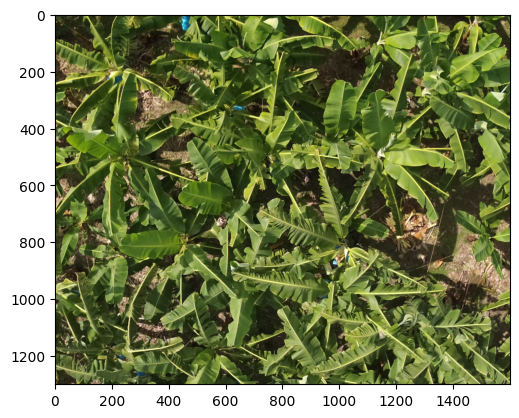

In [21]:
plt.figure()
plt.imshow(x)

    

In [22]:
img_rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB).astype(np.float32)  # NOmodifico para entrenar en escala de grises
    #img_rgb=img.astype(np.float32)
    # diving by 255                                                                                                     
img_rgb /= 255.0

In [23]:
model=model.eval()
model(img_rgb,3)

TypeError: 'int' object is not iterable

In [25]:

import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.patches as patches

In [31]:
image_path = "D:/Alexander_Espinosa/Tesis_Maestria/data/Salida_13_03_23/Dron/100FPLAN/DJI_0020.JPG"
image = Image.open(image_path)

In [32]:
transform = transforms.Compose([
    transforms.Resize((1300, 1600)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalización típica de ImageNet
])
input_image = transform(image).unsqueeze(0)  # Añade una dimensión adicional para el lote (batch)

In [33]:
model_path = './library_new/modelo/content'
model = torch.load(model_path,map_location=torch.device('cpu'))

In [34]:
model.eval()
with torch.no_grad():  # Desactiva el cálculo de gradientes
    output = model(input_image)

In [35]:
output

[{'boxes': tensor([[ 199.3163, 1240.9762,  289.8463, 1299.6305],
          [ 221.7742,  647.4744,  306.5318,  729.3850],
          [   6.2853, 1116.8101,   64.9479, 1210.9097],
          [ 417.8255,   65.9971,  505.8763,  128.9229]]),
  'labels': tensor([1, 1, 1, 1]),
  'scores': tensor([0.9248, 0.6332, 0.1995, 0.1657])}]

In [39]:
for detection in output:
    boxes = detection['boxes']
    labels = detection['labels']
    scores = detection['scores']

    for box, label, score in zip(boxes, labels, scores):
        print(box)
        print(label)
        print(str(score.item()))


tensor([ 199.3163, 1240.9762,  289.8463, 1299.6305])
tensor(1)
0.9248143434524536
tensor([221.7742, 647.4744, 306.5318, 729.3850])
tensor(1)
0.6331658363342285
tensor([   6.2853, 1116.8101,   64.9479, 1210.9097])
tensor(1)
0.19952894747257233
tensor([417.8255,  65.9971, 505.8763, 128.9229])
tensor(1)
0.16567888855934143


In [86]:
def visualize_detections(image, detections):
    # Crea una figura y un objeto de eje
    fig, ax = plt.subplots(1)
    
    # Muestra la imagen
    ax.imshow(image)
    
    # Recorre las detecciones y dibuja los cuadros delimitadores
    for detection in detections:
        boxes = detection['boxes']
        labels = detection['labels']
        scores = detection['scores']
        
        # Recorre cada detección y dibuja el cuadro delimitador
        for box, label, score in zip(boxes, labels, scores):
            x, y, x2, y2 = box.tolist()
            print(f"{x} - {y} - {x2-x} - {y2-y}")
            w=x2-x
            h=y2-y
            # Crea un objeto Rectangle para el cuadro delimitador
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
            
            # Añade el cuadro delimitador a la imagen
            ax.add_patch(rect)
            
            # Añade una etiqueta con la clase y la puntuación
            label_str = f'Clase: {label.item()}, score: {score.item():.2f}'
            ax.text(x, y, label_str, fontsize=8, color='r', verticalalignment='top')
    
    # Desactiva los ejes
    #ax.axis('off')
    
    # Muestra la imagen con las detecciones
    plt.show()

In [2]:


detections = output

visualize_detections(image, detections)

NameError: name 'output' is not defined

In [5]:
x=[{'boxes': tensor([[ 513.6494, 1010.1216,  655.4862, 1143.9073],
          [   4.5606, 1218.0576,  120.6481, 1297.0660],
          [ 122.5734,   90.6594,  302.5996,  157.3955],
          [ 302.3250,  817.4935,  514.7927,  907.4055],
          [ 874.5374,  529.7154,  942.0964,  598.4227],
          [ 706.4800,  129.7427,  791.4750,  241.1258],
          [1404.5941,  301.3378, 1496.6576,  369.0023]]),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1]),
  'scores': tensor([0.9778, 0.9141, 0.8919, 0.2601, 0.2599, 0.1632, 0.0672])}]

NameError: name 'tensor' is not defined

# Prueba transformación

In [23]:
from PIL import Image
from PIL.TiffTags import TAGS
import re
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.transform import Affine
import numpy as np 
import cv2
import imutils
import matplotlib.pyplot as plt



In [32]:
def metadata(imagen):
    img = Image.open(imagen)
# obtenemos los Tags de la metadata y se almacenan en un diccionario
    meta_dict = {TAGS[key]: img.tag[key] for key in img.tag_v2}
    # Se imprime el diccionario para obtener la composición de los datos
    # for rec in meta_dict:
    #     print(rec, ":", meta_dict[rec])

    # Extraemos el indicador xmp
    p = meta_dict.get("XMP")
    s = p.decode("UTF-8")
    # dividimos por el salto de linea y obtenemos una lista
    div = s.split("\n")

    #eliminamos los espacios vacios 

    for ind,recorrido in enumerate(div):
        div[ind]=recorrido.strip() 
    usar = div[17]

    result = re.search(":(.*)=", div[17])
    result.group(1)

    result2 = re.search("\"(.*)\"", div[17])
    result2.group(1)

    metadiccionario = {}
    for ind,recorrido in enumerate(div):
        try:
            metadiccionario[re.search(":(.*)=", div[ind]).group(1)] = re.search("\"(.*)\"", div[ind]).group(1)
        except:
            pass

    metadiccionario = {}
    for ind,recorrido in enumerate(div):
        try:
            metadiccionario[re.search(":(.*)=", div[ind]).group(1)] = re.search("\"(.*)\"", div[ind]).group(1)
        except:
            pass

    #print(metadiccionario)
    return metadiccionario

def TransfromRaster(img_path):
    metadiccionario = metadata(img_path)
    
    altura_vuelo = float(metadiccionario["RelativeAltitude"])
    distancia_focal = float(metadiccionario["CalibratedFocalLength"])

    resolucion = altura_vuelo/distancia_focal
    print(metadiccionario["GpsLongitude"])
    print(metadiccionario["GpsLatitude"])
    min_lon = (float(metadiccionario["GpsLongitude"])) - (
        float(metadiccionario["CalibratedOpticalCenterX"]) * resolucion) / 111111
    max_lon = (float(metadiccionario["GpsLongitude"])) + (
        float(metadiccionario["CalibratedOpticalCenterX"]) * resolucion) / 111111
    min_lat = (float(metadiccionario["GpsLatitude"])) - (
        float(metadiccionario["CalibratedOpticalCenterY"]) * resolucion) / 111111
    max_lat = (float(metadiccionario["GpsLatitude"])) + (
        float(metadiccionario["CalibratedOpticalCenterY"]) * resolucion) / 111111

    img_data = rasterio.open(img_path, 'r')

    bands = [1] #Se especifica las cantidades de canales que tiene la imagen.
    count_bands = len(bands)
    data = img_data.read(bands)
    _, width, height = data.shape 
    print(width/2)
    print(height/2)
    crs = {'init': 'epsg:4326'}

    transform = rasterio.transform.from_bounds(
            min_lon, min_lat, max_lon, max_lat, height, width)
    return transform
    with rasterio.open(
        img_ruta,  # Nombre del nuevo archivo georefenciado
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=count_bands,
        dtype="int8", #Tipo de dato, como la imagenes que se rotaron son de tipo int8, el tipo de escritura debe ser del mismo tipo, para evitar errores a la hora de procesar la imagen
        crs=crs,
        transform=transform,
        ) as dst:
            dst.write(data)

    

In [33]:
img_path = "./DJI_0011.TIF"

trans = TransfromRaster(img_path)

-74.18553757
11.22467042
650.0
800.0


In [35]:
transfor = np.array([[trans.a, trans.b, trans.c], 
                     [trans.d, trans.e, trans.f],
                     [0, 0, 1]], dtype =np.float64)

xy = np.array([[650], #x
               [800], #y
               [1]], dtype=np.float64)

x=np.dot(transfor, xy)   

In [38]:
x[1]

array([11.22465285])

In [40]:
def convertgps(x,y,path_red):

    trans = TransfromRaster(path_red)
    transfor = np.array([[trans.a, trans.b, trans.c], 
                     [trans.d, trans.e, trans.f],
                     [0, 0, 1]], dtype =np.float64)

    xy = np.array([[x], #x
               [y], #y
               [1]], dtype=np.float64)

    x=np.dot(transfor, xy)   
    return x[0],x[1]

In [ ]:
print(convertgps(650,))